For this homework, make sure that you format your notbook nicely and cite all sources in the appropriate sections. Programmatically generate or embed any figures or graphs that you need.

Names: __Mehul Jain, Satyam Shivastava, Pritish Arora__

Step 1: Train your own word embeddings
--------------------------------

(describe the provided dataset that you have chosen here)

Describe what data set you have chosen to compare and contrast with the your chosen provided dataset. Make sure to describe where it comes from and it's general properties.

(describe your dataset here)

In [1]:
# import your libraries here
import pandas as pd
import string
import re 
import nltk

from gensim.models import Word2Vec
from collections import Counter
# from nltk.stem import PorterStemmer
# from nltk.stem import WordNetLemmatizer

# download stopwords list
nltk.download('punkt')
nltk.download('stopwords')
STOPWORDS=nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package punkt to /Users/mehuljain/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mehuljain/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### a) Train embeddings on GIVEN dataset

In [2]:
# preprocessing function
def preprocess(sentence:str, train:bool)-> list:
    """
    This function takes in a string and performs the following preprocessing steps:
    1. remove punctuation and URLs
    2. tokenization
    3. lower case
    4. removing stop words
    5. stemming /lemmatization (still thinking about it)
    6. padding ??
    """
    # remove punctuation
    sentence = re.sub(r'[^\w\s]', ' ', sentence)
    
    # remove urls
    sentence=re.sub(r'http\S+', '', sentence)

    # tokenize using nltk
    tokenized=nltk.word_tokenize(sentence)
    
    # lower case all the tokens
    tokenized=[t.lower() for t in tokenized]

    # remove stopwords
#     if train:
#         tokenized=[w for w in tokenized if w not in STOPWORDS]
        
    # remove single words and numbers
    # removing single words because I don't thinks there are any useful words that are 
    # made of just a single letter
    # also we dont have a use of numbers in our word embeddings 
    tokenized=[t for t in tokenized if len(t)>1 and \
               not bool(re.search("\d",t)) or t in STOPWORDS]
    
    # do we want a lexicon check to see if the words make sense?
        
    # add padding
    #tokenized= list(nltk.lm.preprocessing.pad_both_ends(tokenized, n=2))
    
    return tokenized

In [3]:
# code to train your word embeddings

# Read the file and prepare the training data 
# so that it is in the following format

# data = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
# 			['this', 'is', 'the', 'second', 'sentence'],
# 			['yet', 'another', 'sentence'],
# 			['one', 'more', 'sentence'],
# 			['and', 'the', 'final', 'sentence']]

# read the dataset
df=pd.read_csv('data/spooky-author-identification/train.csv')

# make a list of all the sentences in the dataset
sentences= list(df['text'])

# preprocess the text
tokenized=[preprocess(s,True) for s in sentences]

# preprocessed sentences
prep_sentences=[" ".join(t) for t in tokenized]

In [4]:
# list of all words from dataset A
all_words=[]
for t in tokenized:
    all_words.extend(t)
    
# count frequency of all words
mc1=Counter(all_words)

In [5]:
from gensim.models import Word2Vec

# The dimension of word embedding. 
# This variable will be used throughout the program
# you may vary this as you desire
EMBEDDINGS_SIZE = 200

# Train the Word2Vec model from Gensim. 
# Below are the hyperparameters that are most relevant. 
# But feel free to explore other 
# options too:
# sg = 1
# window = 5
# size = EMBEDDINGS_SIZE
# min_count = 1
model=Word2Vec(tokenized,
               min_count=1,
               vector_size=EMBEDDINGS_SIZE,
               sg=1,
               window=5,
               workers=4) 

In [6]:
# if you save your Word2Vec as the variable model, this will 
# print out the vocabulary size
print('Vocab size {}'.format(len(model.wv)))

Vocab size 25075


In [7]:
# You can save file in txt format, then load later if you wish.
model.wv.save('data/embeddings')

### b) Train embedding on YOUR dataset

In [8]:
# then do a second data set
# first let's try to use the sklearn newsgroup dataset
from sklearn.datasets import fetch_20newsgroups
newsgroups = fetch_20newsgroups(subset='all',remove=('headers', 'footers', 'quotes'))

Let's see an example of the text in the dataset

In [9]:
newsgroups.data[3]

"\nThink!\n\nIt's the SCSI card doing the DMA transfers NOT the disks...\n\nThe SCSI card can do DMA transfers containing data from any of the SCSI devices\nit is attached when it wants to.\n\nAn important feature of SCSI is the ability to detach a device. This frees the\nSCSI bus for other devices. This is typically used in a multi-tasking OS to\nstart transfers on several devices. While each device is seeking the data the\nbus is free for other commands and data transfers. When the devices are\nready to transfer the data they can aquire the bus and send the data.\n\nOn an IDE bus when you start a transfer the bus is busy until the disk has seeked\nthe data and transfered it. This is typically a 10-20ms second lock out for other\nprocesses wanting the bus irrespective of transfer time.\n"

In [10]:
# preprocess the text
tokenized2=[preprocess(s,True) for s in newsgroups.data]

prep_sentences2=[" ".join(t) for t in tokenized2]

In [11]:
# list of all words from dataset B
all_words2=[]
for t in tokenized2:
    all_words2.extend(t)
    
# count frequency of all words
mc2=Counter(all_words2)

Let's train our word embeddings

In [12]:
from gensim.models import Word2Vec

# The dimension of word embedding. 
EMBEDDINGS_SIZE = 200

# Train the Word2Vec model from Gensim. 
model2=Word2Vec(tokenized2,
               min_count=1,
               vector_size=EMBEDDINGS_SIZE,
               sg=1,
               window=5,
               workers=4)
print('Vocab size {}'.format(len(model2.wv)))

# save the word embeddings
model2.wv.save('data/newsgroups_embeddings')

Vocab size 90676


In [13]:
model2.wv['computer']

array([ 0.3027662 ,  0.20773117,  0.03745637,  0.31470782,  0.18749794,
       -0.29148006,  0.41934824,  0.2189896 ,  0.16406007,  0.61589736,
       -0.28806186,  0.07277697,  0.3236489 , -0.20965998,  0.03662143,
       -0.04973361, -0.5287406 , -0.02229302,  0.4276426 , -0.20404527,
        0.46682495,  0.22314397,  0.05141439,  0.02342686, -0.01095459,
        0.23099303, -0.25812435, -0.34765524, -0.01346946, -0.06353052,
        0.27376267,  0.15517527,  0.4179477 , -0.2361381 , -0.10600075,
       -0.16640164, -0.1808382 , -0.06733067,  0.33265617,  0.01215721,
       -0.06434608,  0.31372973, -0.580292  ,  0.10428516, -0.04235056,
        0.01543583, -0.5463049 , -0.2399613 , -0.01037994,  0.13848746,
       -0.14525251,  0.1552883 , -0.14059453,  0.3629769 ,  0.26394588,
       -0.07521955,  0.49884126,  0.03569963, -0.11940733, -0.11128241,
       -0.08723743, -0.32704225, -0.24291962, -0.02378958, -0.15726729,
       -0.22333372, -0.08329262, -0.05612467, -0.2858546 ,  0.60

What text-normalization and pre-processing did you do and why? __YOUR ANSWER HERE__

Step 2: Evaluate the differences between the word embeddings
----------------------------

(make sure to include graphs, figures, and paragraphs with full sentences)

In [14]:
# import libraries here
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

%matplotlib inline

In [15]:
model.wv.most_similar('man', topn=10)

[('gentleman', 0.8519346714019775),
 ('captain', 0.8060848116874695),
 ('lady', 0.8059958219528198),
 ('jermyn', 0.8018598556518555),
 ('woman', 0.7989841103553772),
 ('physician', 0.7980232834815979),
 ('arthur', 0.7965710759162903),
 ('zadok', 0.7942579984664917),
 ('blind', 0.7874640822410583),
 ('wilcox', 0.7828713059425354)]

In [16]:
model2.wv.most_similar('man', topn=10)

[('woman', 0.6342992186546326),
 ('fist', 0.6057571768760681),
 ('spectacular', 0.6022692322731018),
 ('spider', 0.5938520431518555),
 ('hologram', 0.5721617937088013),
 ('wast', 0.5651517510414124),
 ('devil', 0.563679039478302),
 ('story', 0.5604334473609924),
 ('satan', 0.558370053768158),
 ('hail', 0.5574620366096497)]

The two word embeddings have certainly learned different representations for the same word. Let's try to quantify this difference.

<b>Analysis strategy 1:</b>

1. Take 5 most common words from dataset A and 5 from dataset B (not a good idea, instead let's look for the most relevant words). Maybe we should use Tf-Idf and sort the words with the highest values?
2. Apply T-SNE and visualize the clusters
3. Visualize the word embeddings in 3D space

<b>Analysis strategy 2:</b>
Word Analogies (Source 2)

<b> Analysis strategy 3:</b>
Compare cosine similarity with gold values (Simlex?)


In [17]:
def clusters(words: list, model)-> (list,list):
    """
    This function takes in a list of words and returns two lists:
    1. the first list contains all embedding values
    2. the second list contains the list of words similar to the input words
    
    Maybe we should return a dictionary like {word:[(word,embedding)]}
    
    Parameters:
    words: the list of relevant words
    model: Word2Vec model to be used
    
    Returns:
    embedding clusters: list of list
    word_clusters: list of list
    """
    
    # embedding clusters and word clusters
    ec=[]
    wc=[]
    
    for w in words:
        
        embeddings=[]
        similar_words=[]
        
        for sw, _ in model.wv.most_similar(w, topn=30):
            
            # add embedding vector
            embeddings.append(model.wv[sw])
            
            # add similar word
            similar_words.append(sw)
        
        # add list of embeddings
        # add list of similar words
        ec.append(embeddings)
        wc.append(similar_words)
        
    return ec , wc

In [18]:
def plot_clusters(e_clusters, w_clusters, labels, title):
    """
    Add function description
    """
    
    # what is the figure size?
    plt.figure(figsize=(12,8))
    
    # what colors should the clusters be?
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    
    
    for label, embeddings, words, color in zip(labels,e_clusters,w_clusters,colors):
        
        # seperate x and y dimension of the embeddings 
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        
        c=color.reshape(1,-1)
        
        plt.scatter(x, y, c=c, alpha=0.7, label=label)
        
        for i, word in enumerate(words):
            
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
            
    # the legend should be outside the figure        
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    
    # plot the title
    plt.title(title)
    
    plt.grid(True)
    
#     if filename:
#         plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')

    # plot the clusters 
    plt.show()

Implement Tf-Idf to find the relevant words

In [19]:
# make a list of the relevant words
relevant_words=["story","man","ghost","night","evil",\
                "information","source","word","president","article"]

# get list of embedding vectors and similar words
embed_cl,word_cl= clusters(relevant_words, model)
embed_cl2,word_cl2= clusters(relevant_words,model2)

# convert into numpy arrays
embed_cl=np.array(embed_cl)
embed_cl2=np.array(embed_cl2)

Let's visualize for the first dataset

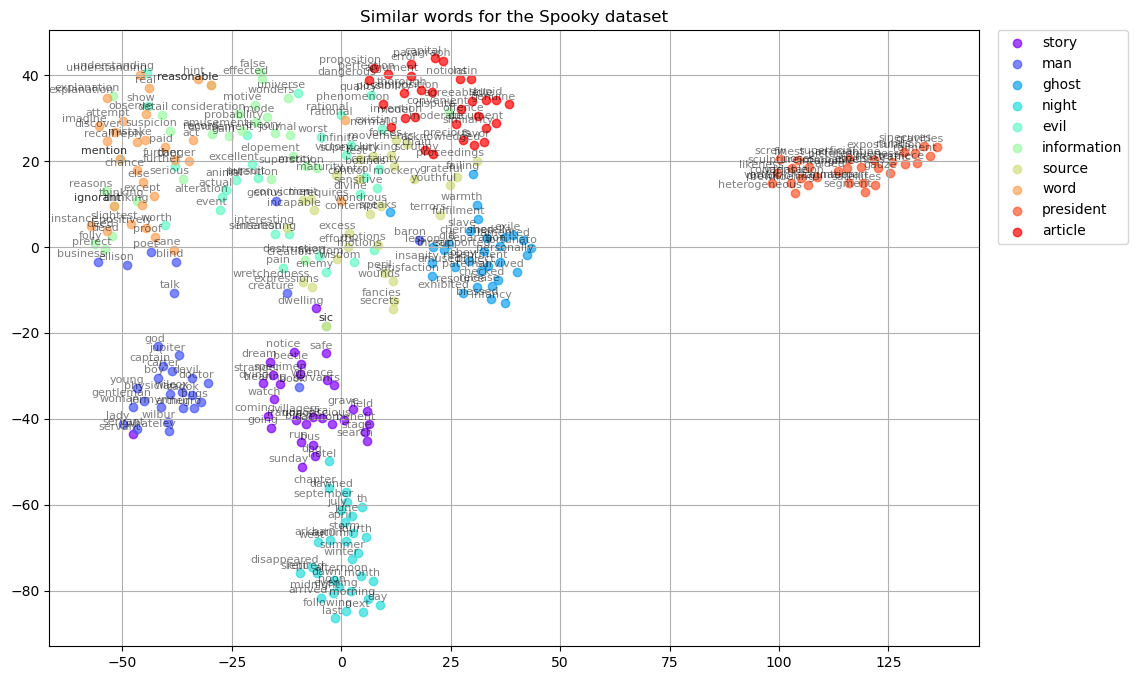

In [20]:
n, m, k = embed_cl.shape

# apply T-SNE
tsne_model2d = TSNE(perplexity=10, n_components=2, init='pca', n_iter=3000,random_state=42)
embeddings2d = np.array(tsne_model2d.fit_transform(embed_cl.reshape(n * m, k))).\
                        reshape(n, m, 2)

# visualize the dataset 
plot_clusters(embeddings2d, word_cl, relevant_words, "Similar words for the Spooky dataset" )

Let's visualize for the second dataset

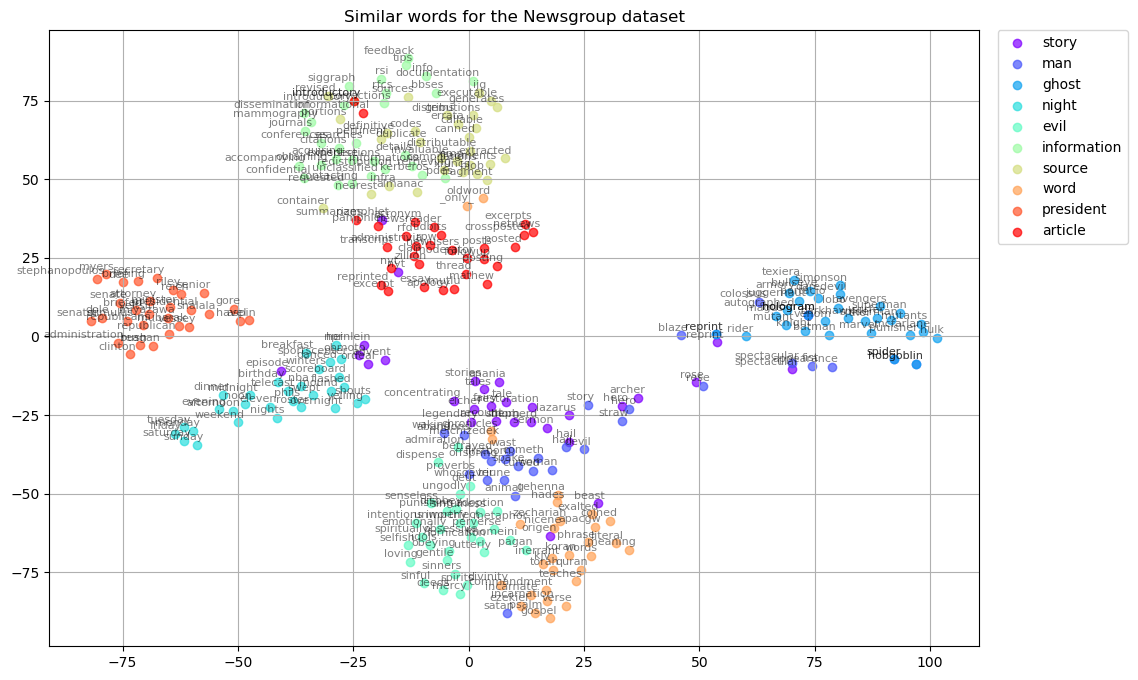

In [21]:
n, m, k = embed_cl2.shape

# apply T-SNE
tsne_model2d = TSNE(perplexity=10, n_components=2, init='pca', n_iter=3500, random_state=42)
embeddings2d = np.array(tsne_model2d.\
                        fit_transform(embed_cl2.reshape(n * m, k))).\
                        reshape(n, m, 2)

# visualize the dataset 
plot_clusters(embeddings2d, word_cl2, relevant_words, "Similar words for the Newsgroup dataset" )

Analysis strategy 2: Word Analogies

In [22]:
# checking for positive similarities
model.wv.most_similar(positive = ['man'], topn=10)

[('gentleman', 0.8519346714019775),
 ('captain', 0.8060848116874695),
 ('lady', 0.8059958219528198),
 ('jermyn', 0.8018598556518555),
 ('woman', 0.7989841103553772),
 ('physician', 0.7980232834815979),
 ('arthur', 0.7965710759162903),
 ('zadok', 0.7942579984664917),
 ('blind', 0.7874640822410583),
 ('wilcox', 0.7828713059425354)]

In [23]:
# checking for negative similarities, which basically means the dissimilar words
model.wv.most_similar(negative = ['man'], topn=10)

[('mille', -0.15516793727874756),
 ('et', -0.1717911809682846),
 ('yxu', -0.20487752556800842),
 ('their', -0.22231529653072357),
 ('est', -0.23746901750564575),
 ('were', -0.2422613501548767),
 ('at', -0.2720883786678314),
 ('its', -0.29476746916770935),
 ('upon', -0.29588237404823303),
 ('are', -0.2982439696788788)]

In [24]:
# performing vector arithmatics to calculate the analogy of word3 given the analogy word1 -> word2
# analogy(word3) = similarity with word2 + similarity with word3 - similarity with word1
def analogy(model, word1, word2, word3):
    result = model.wv.most_similar(positive=[word2, word3], negative=[word1])
    return result[0][0]

In [25]:
#example
analogy(model,'man','sports','woman')
word1 = 'man'
word2 = 'sports'
similar_word1 = ['woman','lady']
similar_results = [analogy(model,word1, word2, similar) for similar in similar_word1]

In [26]:
# Doing a PCA to reduce dimensions of the list of input vectors to 2 and plotting the analogies in the PCA plane.
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

def plot_data(feature_matrix, labels):
    pca = PCA(n_components=2)
    data = pca.fit_transform(feature_matrix)
    
    plt.figure(figsize=(7, 5), dpi=100)
    
    plt.plot(data[:,0], data[:,1], '.')
    
    for i in range(len(data)):
        plt.annotate(labels[i], xy = data[i])
    for i in range(len(data)//2):
        plt.annotate("",
                xy=data[i],
                xytext=data[i+len(data)//2],
                arrowprops=dict(arrowstyle="->",
                                connectionstyle="arc3")
        )

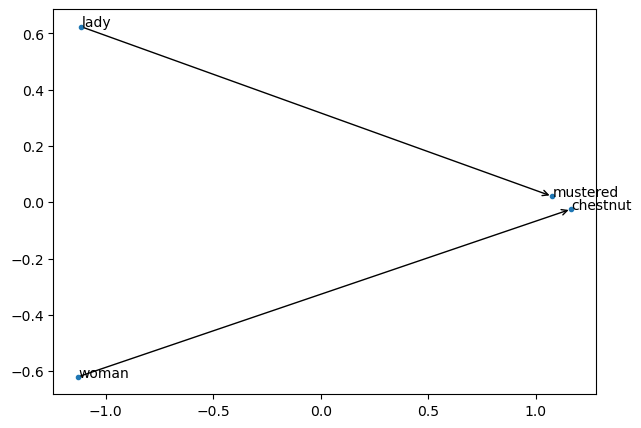

In [27]:
labels = similar_results + similar_word1
data = [model.wv[w] for w in labels]
plot_data(data, labels)

##Write down your analysis:

Cite your sources:
-------------
1. [Google News and Leo Tolstoy: Visualizing Word2Vec Word Embeddings using t-SNE](https://towardsdatascience.com/google-news-and-leo-tolstoy-visualizing-word2vec-word-embeddings-with-t-sne-11558d8bd4d)
2. [How to Solve Analogies with Word2Vec](https://towardsdatascience.com/how-to-solve-analogies-with-word2vec-6ebaf2354009)
3. []()

Step 3: Feedforward Neural Language Model
--------------------------

### a) First, encode  your text into integers

In [28]:
# Importing utility functions from Keras
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import SimpleRNN
from keras.layers import Embedding
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers.legacy import Adam
import numpy as np
from numpy import zeros

# The size of the ngram language model you want to train
# change as needed for your experiments
NGRAM = 4
num_sequences_per_batch = 128 # this is the batch size
epochs=10

# Initializing a Tokenizer
# It is used to vectorize a text corpus. Here, it just creates a mapping from 
# word to a unique index. (Note: Indexing starts from 0)
# Example:
# tokenizer = Tokenizer()
# tokenizer.fit_on_texts(data)
# encoded = tokenizer.texts_to_sequences(data)


In [29]:
# initialize the tokenizer
tokenizer=Tokenizer()

# fit on the first dataset
tokenizer.fit_on_texts(prep_sentences)

# encoded sentences
encoded = tokenizer.texts_to_sequences(prep_sentences)

In [30]:
# let's do the same thing for the second dataset
# initialize the tokenizer
tokenizer2=Tokenizer()

# fit on the first dataset
tokenizer2.fit_on_texts(prep_sentences2)

# encoded sentences
encoded2 = tokenizer.texts_to_sequences(prep_sentences2)

### b) Next, prepare your sequences from text

#### Fixed ngram based sequences 

In [31]:
# testing mechanisms
t=["this","is","a","new","sentence"]
n=2

# this is
# is a
# a new 
# new sentence
for i in range(len(t) - n + 1):
    print(t[i:i+n])

['this', 'is']
['is', 'a']
['a', 'new']
['new', 'sentence']


In [32]:
ngram=[
    ["this","is","a","new","sentence"],
    ["this","is","another","sentence"]
]

[sen[i:i+n] for sen in ngram for i in range(len(sen)-n +1)]

[['this', 'is'],
 ['is', 'a'],
 ['a', 'new'],
 ['new', 'sentence'],
 ['this', 'is'],
 ['is', 'another'],
 ['another', 'sentence']]

In [33]:
def generate_ngram_training_samples(ngram: list, n: int) -> list:
    '''
    Takes the encoded data (list of lists) and 
    generates the training samples out of it.
    Parameters:
    up to you, we've put in what we used
    but you can add/remove as needed
    return: 
    list of lists in the format [[x1, x2, ... , x(n-1), y], ...]
    '''
    # list of training samples
#     training_samples=[]
    
    # generate training samples
#     for sen in ngram:   
#         for i in range(len(sen)- n +1):
#             training_samples.append(sen[i:i+n])
            
    training_samples=[sen[i:i+n] for sen in ngram for i in range(len(sen)-n +1)]
    
    return training_samples


In [34]:
# test the function
ngram=[
    ["this","is","a","new","sentence"],
    ["this","is","another","sentence"]
]
ts= generate_ngram_training_samples(ngram, n=NGRAM)
ts

[['this', 'is', 'a', 'new'],
 ['is', 'a', 'new', 'sentence'],
 ['this', 'is', 'another', 'sentence']]

### c) Then, split the sequences into X and y and create a Data Generator

In [35]:
from gensim.models import KeyedVectors
from gensim.test.utils import datapath

In [36]:
def split_X_y(training_samples: list):
    
    # get the first n-1 tokens from every training sample
    X=[i[:-1] for  i in training_samples]
    
    # get the last token from every training sample
    y=[i[-1] for  i in training_samples]
    
    return X,y 

In [37]:
def read_embeddings(filename:str, tokenizer):
    '''Loads and parses embeddings trained in earlier.
    Parameters and return values are up to you.
    
    Parameters:
    
    '''
    
    #load the embeddings
    embeddings= KeyedVectors.load(filename, mmap='r')
    
    # get word indexes from tokenizer
    word_idx= tokenizer.word_index
    
    # you may find generating the following two dicts useful:
    # word to embedding : {'the':[0....], ...}
    words=(embeddings.key_to_index.keys())
    vocab_size=len(words)
    
#     w_to_e={w: embeddings[w] for w in words}
    
    # index to embedding : {1:[0....], ...} 
#     idx_to_e={word_idx[w]: embeddings[w] for w in words}
    
    
    # intialize embedding matrix
    embedding_matrix = np.zeros((vocab_size, 200))
    
    #fill values in embedding matrix
    for word, i in word_idx.items():
        try:
            #try to set the embedding vector
            embedding_vector = embeddings[word]
            embedding_matrix[i-1] = embedding_vector
            
        except:
            # otherwise assign a randomly initialized vector 
            embedding_vector = np.random.uniform(low=-1, high=1, size=200)
            embedding_matrix[i-1] = embedding_vector
    
    
    return embedding_matrix,vocab_size

In [38]:
def data_generator(X: list, y: list, num_sequences_per_batch: int,epochs: int) -> (list,list):
    '''
    Returns data generator to be used by feed_forward
    https://wiki.python.org/moin/Generators
    https://realpython.com/introduction-to-python-generators/
    
    Yields batches of embeddings and labels to go with them.
    Use one hot vectors to encode the labels 
    (see the to_categorical function)
    
    Parameters:
    X:
    y:
    num_sequences_per_batch:
    filename: embeddings filename
    tokenizer: tokenizer used 
    
    '''
    # number of classes
    num_classes=max(y)
    
    # initialize the batches
    num_samples=0
    X_batch=[]
    y_batch=[]
    
    for feature, target in zip(X*epochs,y*epochs):
        
        if num_samples==num_sequences_per_batch:
            
            # give the batch 
            yield np.array(X_batch),np.array(y_batch)
            
            # reset 
            num_samples=0
            X_batch=[]
            y_batch=[]
        
        # add to the batch
        X_batch.append(feature)
        y_batch.append(target)
        num_samples+=1

Generate training samples on both the datasets 

In [39]:
# Note here that the sequences were in the form: 
# sequence = [x1, x2, ... , x(n-1), y]
# We still need to separate it into [[x1, x2, ... , x(n-1)], ...], [y1, y2, ...]

# generate training samples
ts1=generate_ngram_training_samples(encoded,NGRAM+1)
ts2=generate_ngram_training_samples(encoded2,NGRAM+1)

steps_per_epoch1 = len(ts1)//num_sequences_per_batch  # Number of batches per epoch
steps_per_epoch2 = len(ts2)//num_sequences_per_batch

# seperate into X and y
X1, y1= split_X_y(ts1) 

X2, y2= split_X_y(ts2)

In [40]:
# initialize data_generator
# steps_per_epoch = len(ts1)//num_sequences_per_batch  # Number of batches per epoch
# train_generator = data_generator(X1, y1, num_sequences_per_batch,epochs)

# sample=next(train_generator) # this is how you get data out of generators
# len(sample[0]) # (batch_size, (n-1)*EMBEDDING_SIZE)  (128, 200)
# len(sample[1])   # (batch_size, |V|) to_categorical

### d) Train your models

Let's train the model for the first dataset

In [41]:
embedding_matrix,vocab_size =read_embeddings("data/embeddings",tokenizer)

In [42]:
# code to train a feedforward neural language model 
# on a set of given word embeddings
# make sure not to just copy + paste to train your two models

# Define the model architecture using Keras Sequential API

model = Sequential()
e = Embedding(vocab_size, 200, weights=[embedding_matrix], input_length=NGRAM, trainable=True)
model.add(e)
model.add(Flatten())
model.add(Dense(400,activation='relu'))
model.add(Dense(800,activation='relu'))
model.add(Dense(vocab_size, activation='softmax'))
# compile the model
loss=SparseCategoricalCrossentropy()
model.compile(optimizer=Adam(), loss=loss, metrics=['accuracy'])
# summarize the model
print(model.summary())


Metal device set to: Apple M1 Pro


2023-02-23 10:45:41.935807: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-23 10:45:41.935865: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 4, 200)            5015000   
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 400)               320400    
                                                                 
 dense_1 (Dense)             (None, 800)               320800    
                                                                 
 dense_2 (Dense)             (None, 25075)             20085075  
                                                                 
Total params: 25,741,275
Trainable params: 25,741,275
Non-trainable params: 0
_________________________________________________________________
None


In [43]:
train_generator = data_generator(X1, y1, num_sequences_per_batch,epochs)

# Start training the model
model.fit(x=train_generator, 
          steps_per_epoch=steps_per_epoch1,
          epochs=epochs)

Epoch 1/10


2023-02-23 10:45:42.307860: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-02-23 10:45:42.547893: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3487/3487 [==============================] - 110s 32ms/step - loss: 6.5266 - accuracy: 0.1236
Epoch 2/10
3487/3487 [==============================] - 110s 32ms/step - loss: 5.7769 - accuracy: 0.1457
Epoch 3/10
3487/3487 [==============================] - 111s 32ms/step - loss: 5.3671 - accuracy: 0.1581
Epoch 4/10
3487/3487 [==============================] - 110s 32ms/step - loss: 4.9674 - accuracy: 0.1691
Epoch 5/10
3487/3487 [==============================] - 110s 32ms/step - loss: 4.5777 - accuracy: 0.1827
Epoch 6/10
3487/3487 [==============================] - 110s 32ms/step - loss: 4.2044 - accuracy: 0.2066
Epoch 7/10
3487/3487 [==============================] - 110s 32ms/step - loss: 3.8615 - accuracy: 0.2449
Epoch 8/10
3487/3487 [==============================] - 110s 32ms/step - loss: 3.5553 - accuracy: 0.2859
Epoch 9/10
3487/3487 [==============================] - 112s 32ms/step - loss: 3.2992 - accuracy: 0.3236
Epoch 10/10
3487/3487 [==============================] - 112s 32ms

Let's train the model on the second dataset

In [45]:
# load the embedding matrix
embedding_matrix2,vocab_size2 =read_embeddings("data/newsgroups_embeddings",tokenizer)

# define the model architecture
model2 = Sequential()
e = Embedding(vocab_size2, 200, weights=[embedding_matrix2], input_length=NGRAM, trainable=True)
model2.add(e)
model2.add(Flatten())
model2.add(Dense(200,activation='relu'))
model2.add(Dense(400,activation='relu'))
model2.add(Dense(vocab_size2, activation='softmax'))
# compile the model
loss=SparseCategoricalCrossentropy()
model2.compile(optimizer=Adam(), loss=loss, metrics=['accuracy'])
# summarize the model
print(model2.summary())

# generate data for the second model
train_generator = data_generator(X2, y2, num_sequences_per_batch,epochs)

# Start training the model
model2.fit(x=train_generator, 
          steps_per_epoch=steps_per_epoch2,
          epochs=epochs)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 4, 200)            18135200  
                                                                 
 flatten_2 (Flatten)         (None, 800)               0         
                                                                 
 dense_6 (Dense)             (None, 200)               160200    
                                                                 
 dense_7 (Dense)             (None, 400)               80400     
                                                                 
 dense_8 (Dense)             (None, 90676)             36361076  
                                                                 
Total params: 54,736,876
Trainable params: 54,736,876
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10


2023-02-23 11:06:23.846817: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


10666/22120 [=============>................] - ETA: 19:34 - loss: 6.0209 - accuracy: 0.1214

KeyboardInterrupt: 

### e) Generate Sentences

In [46]:
# generate a sequence from the model
def generate_seq(model: Sequential, 
                 tokenizer: Tokenizer, 
                 seed: list, 
                 n_words: int,
                n_gram:int):
    '''
    Parameters:
        model: your neural network
        tokenizer: the keras preprocessing tokenizer
        seed: [w1, w2, w(n-1)]
        n_words: generate a sentence of length n_words
    Returns: string sentence
    '''
    word_idx=tokenizer.word_index
    
    seed= [word_idx[w] for w in seed]
    
    generated=seed
    
    for i in range(n_words):
        
        if i+1==1:
            y=model.predict(np.array([seed]))
            y_class = y.argmax(axis=-1)[0]
            generated.append(y_class)
            
        else:
            y=model.predict(np.array([generated[(-1* n_gram):]]))
            y_class = y.argmax(axis=-1)[0]
            generated.append(y_class)

            
    generated=[key for w in generated for key in word_idx if w== word_idx[key]]
    
    return " ".join(generated)

In [47]:
generate_seq(model,tokenizer,["that","was","great","now"],50,NGRAM)

1/1 [==============================] - 0s 12ms/step


2023-02-23 11:24:42.328771: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 12ms/step


'that was great now that the old man is commonly called contagious like the bones of roaming and radical boned as of a land over the horizon and the cult muscles of mesmerism to which i had previously arrived in the steps of the waltzers were quieted and there was no lack of the'

### f) Compare your generated sentences

Generate a sentence using the first model

In [ ]:
generate_seq(model,tokenizer,["that","was","great","now"],50,NGRAM)

In [ ]:
Generate a sentence using the second model

In [ ]:
generate_seq(model2,tokenizer,["that","was","great","now"],50,NGRAM)

Sources Cited
----------------------------


1. https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical
2. https://neptune.ai/blog/keras-loss-functions
3. https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/
4. https://wiki.python.org/moin/Generators
5. 